# Optimizer (November 17, 2024)

## Optimize the following function

$$ f(x_1, x_2) = 0.1w_1^2 + 2w_2^2 $$

### With `Gradient Descent`

> $$ W = W - \alpha * dW $$

> $$\begin{align*}
>    W & = [w_1, w_2] \\
>    => dW & = [0.2w_1, 4w_2]
\end{align*} $$

Initial values:
$$
w_1 = -5\\
w_2 = -2\\
\alpha = 0.4
$$

Epoch 1:
$$
\begin{align*}
dW & \leftarrow [0.2w_1, 4w_2] \\
   & = [0.2*(-5), 4*(-2)] \\
   & = [-1, -8] \\
W & \leftarrow W - \alpha*dW\\
  & = [-5,-2] - 0.4*[-1,-8]\\
  & = [-4.6, 1.2]
\end{align*}
$$

Epoch 2:
$$
\begin{align*}
dW & \leftarrow [0.2w_1, 4w_2] \\
   & = [0.2*(-4.6), 4*(1.2)] \\
   & = [-0.92, 4.8] \\
W & \leftarrow W - \alpha*dW \\
  & = [-4.2, 1.2] - 0.4*[-0.92, 4.8] \\
  & = [-4.232, -0.72]
\end{align*}
$$

In [ ]:
import numpy as np

In [ ]:
def df_W(W):
    return np.array([0.2, 4]) * W

In [ ]:
def sgd(W, dW, lr):
    W = W - lr * dW
    return W

In [ ]:
def train_p1(optimizer, lr, epochs):
    W = np.array([-5, -2], dtype=np.float32)
    results = [W]
    for _ in range(epochs):
        dW = df_W(W)
        W = optimizer(W, dW, lr)
        results.append(W)
    return results

In [ ]:
train_p1(sgd, 0.4, 30)

[array([-5., -2.], dtype=float32),
 array([-4.6,  1.2]),
 array([-4.232, -0.72 ]),
 array([-3.89344,  0.432  ]),
 array([-3.5819648, -0.2592   ]),
 array([-3.29540762,  0.15552   ]),
 array([-3.03177501, -0.093312  ]),
 array([-2.78923301,  0.0559872 ]),
 array([-2.56609437, -0.03359232]),
 array([-2.36080682,  0.02015539]),
 array([-2.17194227, -0.01209324]),
 array([-1.99818689,  0.00725594]),
 array([-1.83833194, -0.00435356]),
 array([-1.69126538,  0.00261214]),
 array([-1.55596415, -0.00156728]),
 array([-1.43148702e+00,  9.40369969e-04]),
 array([-1.31696806e+00, -5.64221981e-04]),
 array([-1.21161061e+00,  3.38533189e-04]),
 array([-1.11468176e+00, -2.03119913e-04]),
 array([-1.02550722e+00,  1.21871948e-04]),
 array([-9.43466646e-01, -7.31231688e-05]),
 array([-8.67989314e-01,  4.38739013e-05]),
 array([-7.98550169e-01, -2.63243408e-05]),
 array([-7.34666155e-01,  1.57946045e-05]),
 array([-6.75892863e-01, -9.47676268e-06]),
 array([-6.21821434e-01,  5.68605761e-06]),
 array([-

### With `Gradient Descent + Momentum`

> \begin{align*}
>  V_t & = \beta V_{t-1}+(1-\beta)dW_t \\
>  W_t & = W_{t-1} - \alpha*V_t
> \end{align*}

> $$
> \begin{align*}
>    W & = [w_1, w_2] \\
>    => dW & = [0.2w_1, 4w_2]
> \end{align*}
$$

Initial values:
$$ \begin{align*}
W & = [w_1, w_2] = [-5,-2]\\
V & = [v_1, v_2] = [0, 0]\\
\alpha & = 0.6 \\
\beta & = 0.5
\end{align*} $$

Epoch 1:
$$
\begin{align*}
t & \leftarrow 1\\
dW_1 & \leftarrow [0.2w_1, 4w_2] \\
   & = [0.2*(-5), 4*(-2)] \\
   & = [-1, -8] \\
V_1 & \leftarrow \beta V_{0}+(1-\beta)dW_1\\
    & = 0.5*[0, 0] + (1-0.5)*[-1, -8] \\
    & = [-0.5, -4] \\
W_1 & \leftarrow W_0 - \alpha V_1 \\
    & = [-5, -2] - 0.6*[-0.5,-4] \\
    & = [-4.7, 0.4]
\end{align*}
$$

Epoch 2:
$$
\begin{align*}
t & \leftarrow 2\\
dW_2 & \leftarrow [0.2w_1, 4w_2] \\
   & = [0.2*(-4.7), 4*(0.4)] \\
   & = [-0.94, 1.6] \\
V_2 & \leftarrow \beta V_{1}+(1-\beta)dW_2\\
    & = 0.5*[-0.5,-4] + (1-0.5)*[-0.94, 1.6] \\
    & = [-0.72, -1.2 ] \\
W_2 & \leftarrow W_1 - \alpha V_2 \\
    & = [-4.7, 0.4] - 0.6*[-0.72, -1.2 ] \\
    & = [-4.268,  1.12 ]
\end{align*}
$$

In [ ]:
def df_W(W):
    return np.array([0.2, 4]) * W


def sgd_momentum(W, dW, V, lr, beta):
    V_new = beta * V + (1-beta)*dW
    W_new = W - lr * V_new
    return V_new, W_new


def train_p2(optimizer, lr, epochs):
    W = np.array([-5, -2], dtype=np.float32)
    V = np.zeros_like(W)
    beta = 0.5
    results = [W]
    for _ in range(epochs):
        dW = df_W(W)
        V, W = optimizer(W, dW, V, lr, beta)
        results.append(W)
    return results


train_p2(sgd_momentum, 0.6, 30)

[array([-5., -2.], dtype=float32),
 array([-4.7,  0.4]),
 array([-4.268,  1.12 ]),
 array([-3.79592,  0.136  ]),
 array([-3.3321248, -0.5192   ]),
 array([-2.90029971, -0.22376   ]),
 array([-2.51036919,  0.192472  ]),
 array([-2.16478177,  0.1696216 ]),
 array([-1.86210116, -0.04534952]),
 array([-1.59903478, -0.09841566]),
 array([-1.37155951, -0.00684994]),
 array([-1.1755283 ,  0.04715285]),
 array([-1.006981  ,  0.01757082]),
 array([-0.86228849, -0.01830518]),
 array([-0.73820492, -0.01427696]),
 array([-0.63187084,  0.0048695 ]),
 array([-0.54079155,  0.00859933]),
 array([-4.62804416e-01,  1.45050014e-04]),
 array([-0.39604258, -0.00425615]),
 array([-0.33889911, -0.00134937]),
 array([-0.28999343,  0.00172326]),
 array([-0.24814098,  0.00119166]),
 array([-0.2123263 , -0.00050413]),
 array([-0.18167938, -0.00074707]),
 array([-1.55455157e-01,  2.79448010e-05]),
 array([-0.13301574,  0.00038192]),
 array([-1.13815082e-01,  1.00603444e-04]),
 array([-0.09738585, -0.00016078]),
 

### With `RMSProp`

> \begin{align*}
> S_t & = \gamma S_{t-1} + (1-\gamma)dW_t^2 \\
> W_t & = W_{t-1} - \alpha*\dfrac{dW_t}{\sqrt{S_t+\epsilon}}
> \end{align*}

Initial values:
$$ \begin{align*}
W_0 & = [w_1, w_2] = [-5,-2]\\
S_0 & = [s_1, s_2] = [0, 0]\\
\alpha & = 0.3 \\
\gamma & = 0.9 \\
\epsilon & = 10^{-6}
\end{align*}$$

Epoch 1:
$$
\begin{align*}
t & \leftarrow 1\\
dW_1 & \leftarrow [0.2w_1, 4w_2] \\
   & = [0.2*(-5), 4*(-2)] \\
   & = [-1, -8] \\
\Rightarrow dW_1^2 & = dW_1 \odot dW_1 \\
                   & = [-1, -8] \odot [-1, -8] \\
                   & = [1, 64] \\
S_1 & \leftarrow \gamma S_{0}+(1-\gamma)dW_1^2\\
    & = 0.9*[0, 0] + (1-0.9)*[1, 64] \\
    & = [0.1, 6.4] \\
W_1 & \leftarrow W_0 - \alpha * \dfrac{dW_1}{\sqrt{S_1+\epsilon}} \\
    & = [-5,-2] - 0.3*\left[\dfrac{1}{\sqrt{0.1+10^{-6}}} * (-1), \dfrac{1}{\sqrt{6.4+10^{-6}}} * (-8)\right] \\
    & \approx [-4.0513, -1.0513]
\end{align*}
$$

Epoch 2:
$$
\begin{align*}
t & \leftarrow 2\\
dW_2 & \leftarrow [0.2w_1, 4w_2] \\
   & = [0.2*(-4.0513), 4*(-1.0513)] \\
   & \approx [-0.8103, -4.2053] \\
\Rightarrow dW_2^2 & = dW_2 \odot dW_2 \\
                   & = [-0.8103, -4.2053] \odot [-0.8103, -4.2053] \\
                   & \approx [0.6565, 17.6843] \\
S_2 & \leftarrow \gamma S_1+(1-\gamma)dW_2^2\\
    & = 0.9*[0.1, 6.4] + (1-0.9)*[0.6565, 17.6843] \\
    & \approx [0.1557, 7.5284] \\
W_2 & \leftarrow W_1 - \alpha * \dfrac{dW_2}{\sqrt{S_2+\epsilon}} \\
    & = [-4.0513, -1.0513] - 0.3*\left[\dfrac{1}{\sqrt{0.1557+10^{-6}}} * (-1.6205), \dfrac{1}{\sqrt{7.5284+10^{-6}}} * (-4.2053)\right] \\
    & \approx [-3.4352, -0.5915]
\end{align*}
$$

In [ ]:
def df_W(W):
    return np.array([0.4, 4]) * W


def rmsprop(W, dW, S, lr, gamma, epsilon):
    S_new = gamma * S + (1-gamma)*dW*dW
    W_new = W - lr * dW/np.sqrt(S_new+epsilon)
    return S_new, W_new


def train_p3(optimizer, lr, epochs):
    W = np.array([-5, -2], dtype=np.float32)
    S = np.zeros_like(W)
    gamma = 0.9
    epsilon = 1e-6
    results = [W]
    for _ in range(epochs):
        dW = df_W(W)
        S, W = optimizer(W, dW, S, lr, gamma, epsilon)
        results.append(W)
    return results


train_p3(rmsprop, 0.3, 30)

[array([-5., -2.], dtype=float32),
 array([-4.05131789, -1.05131678]),
 array([-3.43519281, -0.59152343]),
 array([-2.95893161, -0.3294394 ]),
 array([-2.56545722, -0.17756482]),
 array([-2.22919966, -0.09163256]),
 array([-1.93626156, -0.04494499]),
 array([-1.67817088, -0.02081423]),
 array([-1.44934392, -0.00903559]),
 array([-1.24587616, -0.00364591]),
 array([-1.06489733, -0.00135351]),
 array([-9.04196768e-01, -4.56444431e-04]),
 array([-7.61991235e-01, -1.37562928e-04]),
 array([-6.36773507e-01, -3.62601019e-05]),
 array([-5.27210543e-01, -8.11337456e-06]),
 array([-4.32074135e-01, -1.47473412e-06]),
 array([-3.50194482e-01, -2.02783991e-07]),
 array([-2.80430983e-01, -1.84231187e-08]),
 array([-2.21656535e-01, -7.67742748e-10]),
 array([-1.72752581e-01,  7.80451998e-12]),
 array([-1.32612565e-01, -5.05794800e-13]),
 array([-1.00151561e-01,  6.19123501e-14]),
 array([-7.43198850e-02, -1.13373781e-14]),
 array([-5.41185515e-02,  2.80166702e-15]),
 array([-3.86146217e-02, -8.81341

### With `Adam`

> \begin{align*}
> V_t & = \beta_1V_{t-1} + (1-\beta_1)dW_t  \\
> S_t & = \beta_2 S_{t-1} + (1-\beta_2)dW_t^2 \\
> \hat{V}_t & = \dfrac{V_t}{1-\beta_1^t} \\
> \hat{S}_t & = \dfrac{S_t}{1-\beta_2^t} \\
> W_t & = W_{t-1} - \alpha*\dfrac{\hat{V}_t}{\sqrt{\hat{S}_t}+\epsilon}
> \end{align*}

Initial values:
$$ \begin{align*}
W_0 & = [w_1, w_2] = [-5,-2]\\
V_0 & = [s_1, s_2] = [0, 0]\\
S_0 & = [s_1, s_2] = [0, 0]\\
\alpha & = 0.2 \\
\beta_1 & = 0.9 \\
\beta_2 & = 0.999 \\
\epsilon & = 10^{-6}
\end{align*}
$$

Epoch 1:
$$
\begin{align*}
t & \leftarrow 1\\
dW_1 & \leftarrow [0.2w_1, 4w_2] \\
   & = [0.2*(-5), 4*(-2)] \\
   & = [-1, -8] \\
\Rightarrow dW_1^2 & = dW_1 \odot dW_1 \\
                   & = [-1, -8] \odot [-1, -8] \\
                   & = [1, 64] \\
V_1 & \leftarrow \gamma_1 V_{0}+(1-\gamma_1)dW_1\\
    & = 0.9*[0, 0] + (1-0.9)*[-1, -8] \\
    & = [-0.1, -0.8] \\
\Rightarrow \hat{V}_1 & = \dfrac{V_1}{1-\beta_1^t} \\
    & = \left[\dfrac{-0.2}{1-0.9^1}, \dfrac{-0.8}{1-0.9^1}\right] \\
    & = [-1, -8] \\
S_1 & \leftarrow \gamma_2 S_{0}+(1-\gamma_2)dW_1^2\\
    & = 0.999*[0, 0] + (1-0.999)*[1, 64] \\
    & = [0.001, 0.064] \\
\Rightarrow \hat{S}_1 & \leftarrow \dfrac{S_1}{1-\gamma_2^t} \\
    & = \left[\dfrac{0.001}{1-0.999^1}, \dfrac{0.064}{1-0.999^1}\right] \\
    & = [1, 64] \\
W_1 & \leftarrow W_0 - \alpha * \dfrac{\hat{V}_1}{\sqrt{\hat{S}_1}+\epsilon} \\
    & = [-5,-2] - 0.2*\left[\dfrac{1}{\sqrt{1}+10^{-6}} * (-1), \dfrac{1}{\sqrt{64}+10^{-6}} * (-8)\right] \\
    & \approx [-4.8, -1.8]
\end{align*}
$$

Epoch 2:
$$
\begin{align*}
t & \leftarrow 1\\
dW_2 & \leftarrow [0.4w_1, 4w_2] \\
   & = [0.2*(-4.8), 4*(-1.8)] \\
   & = [-0.96, -7.2] \\
\Rightarrow dW_2^2 & = dW_2 \odot dW_2 \\
                   & = [-0.96, -7.2] \odot [-0.96, -7.2] \\
                   & \approx [0.9216, 51.84] \\
V_2 & \leftarrow \gamma_1 V_{1}+(1-\gamma_1)dW_2\\
    & = 0.9*[-0.1, -0.8] + (1-0.9)*[-0.96, -7.2] \\
    & = [-0.0186, -1.44] \\
\Rightarrow \hat{V}_1 & = \dfrac{V_2}{1-\beta_1^t} \\
    & = \left[\dfrac{-0.0372}{1-0.9^2}, \dfrac{-1.44}{1-0.9^2}\right] \\
    & \approx [-1.9579, -7.579] \\
S_2 & \leftarrow \gamma_2 S_{1}+(1-\gamma_2)dW_2^2\\
    & = 0.999*[0.001, 0.064] + (1-0.999)*[0.9216, 51.84] \\
    & = [0.0019, 0.1158] \\
\Rightarrow \hat{S}_2 & \leftarrow \dfrac{S_2}{1-\gamma_2^t} \\
    & = \left[\dfrac{0.0077}{1-0.999^2}, \dfrac{0.1158}{1-0.999^2}\right] \\
    & \approx [0.9608, 57.917] \\
W_1 & \leftarrow W_0 - \alpha * \dfrac{\hat{V}_1}{\sqrt{\hat{S}_1}+\epsilon} \\
    & = [-4.8, -1.8] - 0.2*\left[\dfrac{1}{\sqrt{0.9608}+10^{-6}} * (-1.9579), \dfrac{1}{\sqrt{57.917}+10^{-6}} * (-7.579)\right] \\
    & \approx [-4.6003, -1.6008]
\end{align*}
$$

In [ ]:
def df_W(W):
    return np.array([0.4, 4]) * W


def adam(W, dW, t, V, S, lr, gamma_1, gamma_2, epsilon):
    V_new = gamma_1*V + (1-gamma_1)*dW
    S_new = gamma_2 * S + (1-gamma_2)*dW*dW
    V_corr = V_new / (1-gamma_1**t)
    S_corr = S_new / (1-gamma_2**t)
    W_new = W - lr * V_corr/(np.sqrt(S_corr)+epsilon)
    return V_new, S_new, W_new


def train_p4(optimizer, lr, epochs):
    W = np.array([-5, -2], dtype=np.float32)
    V = np.zeros_like(W)
    S = np.zeros_like(W)
    gamma_1 = 0.9
    gamma_2 = 0.999
    epsilon = 1e-6
    results = [W]
    for t in range(epochs):
        dW = df_W(W)
        V, S, W = optimizer(W, dW, t+1, V, S, lr, gamma_1, gamma_2, epsilon)
        results.append(W)
    return results


train_p4(adam, 0.2, 30)

[array([-5., -2.], dtype=float32),
 array([-4.8000001 , -1.80000002]),
 array([-4.60025458, -1.60082451]),
 array([-4.40094817, -1.40317262]),
 array([-4.20227723, -1.20787822]),
 array([-4.00444981, -1.01592745]),
 array([-3.80768576, -0.82847307]),
 array([-3.61221659, -0.64684159]),
 array([-3.41828539, -0.47252765]),
 array([-3.22614645, -0.30716934]),
 array([-3.03606486, -0.15249855]),
 array([-2.8483159 , -0.01026326]),
 array([-2.66318417,  0.11787552]),
 array([-2.48096263,  0.23046161]),
 array([-2.30195133,  0.3263587 ]),
 array([-2.12645586,  0.40484195]),
 array([-1.95478566,  0.46564961]),
 array([-1.78725195,  0.50898799]),
 array([-1.62416544,  0.53549442]),
 array([-1.46583375,  0.54617144]),
 array([-1.3125587 ,  0.54230812]),
 array([-1.16463323,  0.52540206]),
 array([-1.02233827,  0.4970906 ]),
 array([-0.8859395,  0.4590951]),
 array([-0.755684  ,  0.41317781]),
 array([-0.631797 ,  0.3611089]),
 array([-0.51447868,  0.30464048]),
 array([-0.40390125,  0.24548409]

## MLP model with different optimizers for FashionMNIST dataset

In [ ]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
import numpy as np

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)

In [ ]:
batch_size = 512
num_epochs = 300
lr = 0.01

In [ ]:
train_dataset = FashionMNIST(
    root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_dataset = FashionMNIST(
    root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size)

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)
        for layer in [self.layer1, self.layer2, self.layer3, self.layer4, self.layer5, self.output]:
            torch.nn.init.normal_(layer.weight, mean=0, std=0.05)
            torch.nn.init.normal_(layer.bias, mean=0, std=0.05)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        x = self.layer3(x)
        x = self.sigmoid(x)
        x = self.layer4(x)
        x = self.sigmoid(x)
        x = self.layer5(x)
        x = self.sigmoid(x)
        out = self.output(x)
        return out

In [ ]:
def train(model, optimizer, criterion, train_loader, test_loader, num_epochs):
  train_losses = []
  train_acc = []
  val_losses = []
  val_acc = []
  for epoch in range(num_epochs):
      model.train()
      t_loss = 0
      t_acc = 0
      cnt = 0
      for X, y in train_loader:
          X, y = X.to(device), y.to(device)
          optimizer.zero_grad()
          outputs = model(X)
          loss = criterion(outputs, y)
          loss.backward()
          optimizer.step()
          t_loss += loss.item()
          t_acc += (torch.argmax(outputs, 1) == y).sum().item()
          cnt += len(y)
      t_loss /= len(train_loader)
      train_losses.append(t_loss)
      t_acc /= cnt
      train_acc.append(t_acc)

      model.eval()
      v_loss = 0
      v_acc = 0
      cnt = 0
      with torch.no_grad():
          for X, y in test_loader:
              X, y = X.to(device), y.to(device)
              outputs = model(X)
              loss = criterion(outputs, y)
              v_loss += loss.item()
              v_acc += (torch.argmax(outputs, 1) == y).sum().item()
              cnt += len(y)
      v_loss /= len(test_loader)
      val_losses.append(v_loss)
      v_acc /= cnt
      val_acc.append(v_acc)
      print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {t_loss:.4f}, Train_Acc: {t_acc:.4f}, Validation Loss: {v_loss:.4f}, Val_Acc: {v_acc:.4f}")
  return train_losses, train_acc, val_losses, val_acc

In [ ]:
train_losses = {}
train_acc = {}
val_losses = {}
val_acc = {}

### With `Gradient Descent`

In [ ]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
################## YOUR CODE HERE ##################
"""Cấu hình optimizer theo yêu cầu đề bài"""
optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)
####################################################

In [ ]:
optimizer_name = 'Gradient Descent'
train_losses[optimizer_name], train_acc[optimizer_name], val_losses[optimizer_name], val_acc[optimizer_name] = train(model, optimizer, criterion, train_loader, test_loader, num_epochs)

Epoch 1/300, Train_Loss: 2.3050, Train_Acc: 0.0983, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 2/300, Train_Loss: 2.3028, Train_Acc: 0.0999, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 3/300, Train_Loss: 2.3028, Train_Acc: 0.0997, Validation Loss: 2.3028, Val_Acc: 0.1000
Epoch 4/300, Train_Loss: 2.3028, Train_Acc: 0.0986, Validation Loss: 2.3029, Val_Acc: 0.0944
Epoch 5/300, Train_Loss: 2.3028, Train_Acc: 0.0994, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 6/300, Train_Loss: 2.3028, Train_Acc: 0.0982, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 7/300, Train_Loss: 2.3028, Train_Acc: 0.0986, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 8/300, Train_Loss: 2.3028, Train_Acc: 0.0989, Validation Loss: 2.3028, Val_Acc: 0.1000
Epoch 9/300, Train_Loss: 2.3028, Train_Acc: 0.0975, Validation Loss: 2.3028, Val_Acc: 0.1000
Epoch 10/300, Train_Loss: 2.3028, Train_Acc: 0.1002, Validation Loss: 2.3028, Val_Acc: 0.1000
Epoch 11/300, Train_Loss: 2.3028, Train_Acc: 0.0999, Validation Loss:

### With `Gradient Descent + Momentum`

In [ ]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
################## YOUR CODE HERE ##################
optimizer = torch.optim.SGD(params=model.parameters(), lr=lr, momentum=0.5, dampening=0.5)
####################################################

In [ ]:
optimizer_name = 'Gradient Descent + Momentum'
train_losses[optimizer_name], train_acc[optimizer_name], val_losses[optimizer_name], val_acc[optimizer_name] = train(model, optimizer, criterion, train_loader, test_loader, num_epochs)

Epoch 1/300, Train_Loss: 2.3035, Train_Acc: 0.0999, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 2/300, Train_Loss: 2.3028, Train_Acc: 0.0957, Validation Loss: 2.3026, Val_Acc: 0.1180
Epoch 3/300, Train_Loss: 2.3028, Train_Acc: 0.0967, Validation Loss: 2.3026, Val_Acc: 0.1000
Epoch 4/300, Train_Loss: 2.3028, Train_Acc: 0.0981, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 5/300, Train_Loss: 2.3028, Train_Acc: 0.1000, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 6/300, Train_Loss: 2.3028, Train_Acc: 0.0999, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 7/300, Train_Loss: 2.3028, Train_Acc: 0.0978, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 8/300, Train_Loss: 2.3028, Train_Acc: 0.0992, Validation Loss: 2.3027, Val_Acc: 0.1000
Epoch 9/300, Train_Loss: 2.3028, Train_Acc: 0.0972, Validation Loss: 2.3026, Val_Acc: 0.1000
Epoch 10/300, Train_Loss: 2.3027, Train_Acc: 0.0992, Validation Loss: 2.3028, Val_Acc: 0.1000
Epoch 11/300, Train_Loss: 2.3028, Train_Acc: 0.0990, Validation Loss:

### With `RMSProp`

In [ ]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
################## YOUR CODE HERE ##################
optimizer = torch.optim.RMSprop(params=model.parameters(), lr=lr, alpha=0.9)
####################################################

In [ ]:
optimizer_name = 'RMSProp'
train_losses[optimizer_name], train_acc[optimizer_name], val_losses[optimizer_name], val_acc[optimizer_name] = train(model, optimizer, criterion, train_loader, test_loader, num_epochs)

Epoch 1/300, Train_Loss: 1.6483, Train_Acc: 0.2595, Validation Loss: 1.2960, Val_Acc: 0.3470
Epoch 2/300, Train_Loss: 1.1953, Train_Acc: 0.4251, Validation Loss: 1.2027, Val_Acc: 0.4116
Epoch 3/300, Train_Loss: 0.9710, Train_Acc: 0.5564, Validation Loss: 0.9793, Val_Acc: 0.5882
Epoch 4/300, Train_Loss: 0.8315, Train_Acc: 0.6298, Validation Loss: 0.8339, Val_Acc: 0.6540
Epoch 5/300, Train_Loss: 0.7406, Train_Acc: 0.7015, Validation Loss: 1.0603, Val_Acc: 0.5932
Epoch 6/300, Train_Loss: 0.6708, Train_Acc: 0.7296, Validation Loss: 0.7274, Val_Acc: 0.7144
Epoch 7/300, Train_Loss: 0.6410, Train_Acc: 0.7459, Validation Loss: 0.6629, Val_Acc: 0.7663
Epoch 8/300, Train_Loss: 0.5996, Train_Acc: 0.7820, Validation Loss: 0.6890, Val_Acc: 0.7344
Epoch 9/300, Train_Loss: 0.5649, Train_Acc: 0.7974, Validation Loss: 0.6721, Val_Acc: 0.7457
Epoch 10/300, Train_Loss: 0.5458, Train_Acc: 0.8046, Validation Loss: 1.0111, Val_Acc: 0.6092
Epoch 11/300, Train_Loss: 0.5237, Train_Acc: 0.8179, Validation Loss:

### With `Adam`

In [ ]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
################## YOUR CODE HERE ##################
optimizer = torch.optim.Adam(params=model.parameters(), lr=lr, betas=(0.9, 0.999))
####################################################

In [ ]:
optimizer_name = 'Adam'
train_losses[optimizer_name], train_acc[optimizer_name], val_losses[optimizer_name], val_acc[optimizer_name] = train(model, optimizer, criterion, train_loader, test_loader, num_epochs)

Epoch 1/300, Train_Loss: 1.6187, Train_Acc: 0.3070, Validation Loss: 1.0520, Val_Acc: 0.4679
Epoch 2/300, Train_Loss: 0.8188, Train_Acc: 0.6560, Validation Loss: 0.6737, Val_Acc: 0.7436
Epoch 3/300, Train_Loss: 0.5676, Train_Acc: 0.7926, Validation Loss: 0.5268, Val_Acc: 0.8121
Epoch 4/300, Train_Loss: 0.4527, Train_Acc: 0.8423, Validation Loss: 0.4540, Val_Acc: 0.8427
Epoch 5/300, Train_Loss: 0.3897, Train_Acc: 0.8639, Validation Loss: 0.4423, Val_Acc: 0.8440
Epoch 6/300, Train_Loss: 0.3709, Train_Acc: 0.8707, Validation Loss: 0.4160, Val_Acc: 0.8482
Epoch 7/300, Train_Loss: 0.3476, Train_Acc: 0.8771, Validation Loss: 0.4281, Val_Acc: 0.8454
Epoch 8/300, Train_Loss: 0.3375, Train_Acc: 0.8800, Validation Loss: 0.3777, Val_Acc: 0.8666
Epoch 9/300, Train_Loss: 0.3129, Train_Acc: 0.8882, Validation Loss: 0.3754, Val_Acc: 0.8671
Epoch 10/300, Train_Loss: 0.3020, Train_Acc: 0.8908, Validation Loss: 0.3792, Val_Acc: 0.8696
Epoch 11/300, Train_Loss: 0.3017, Train_Acc: 0.8911, Validation Loss:

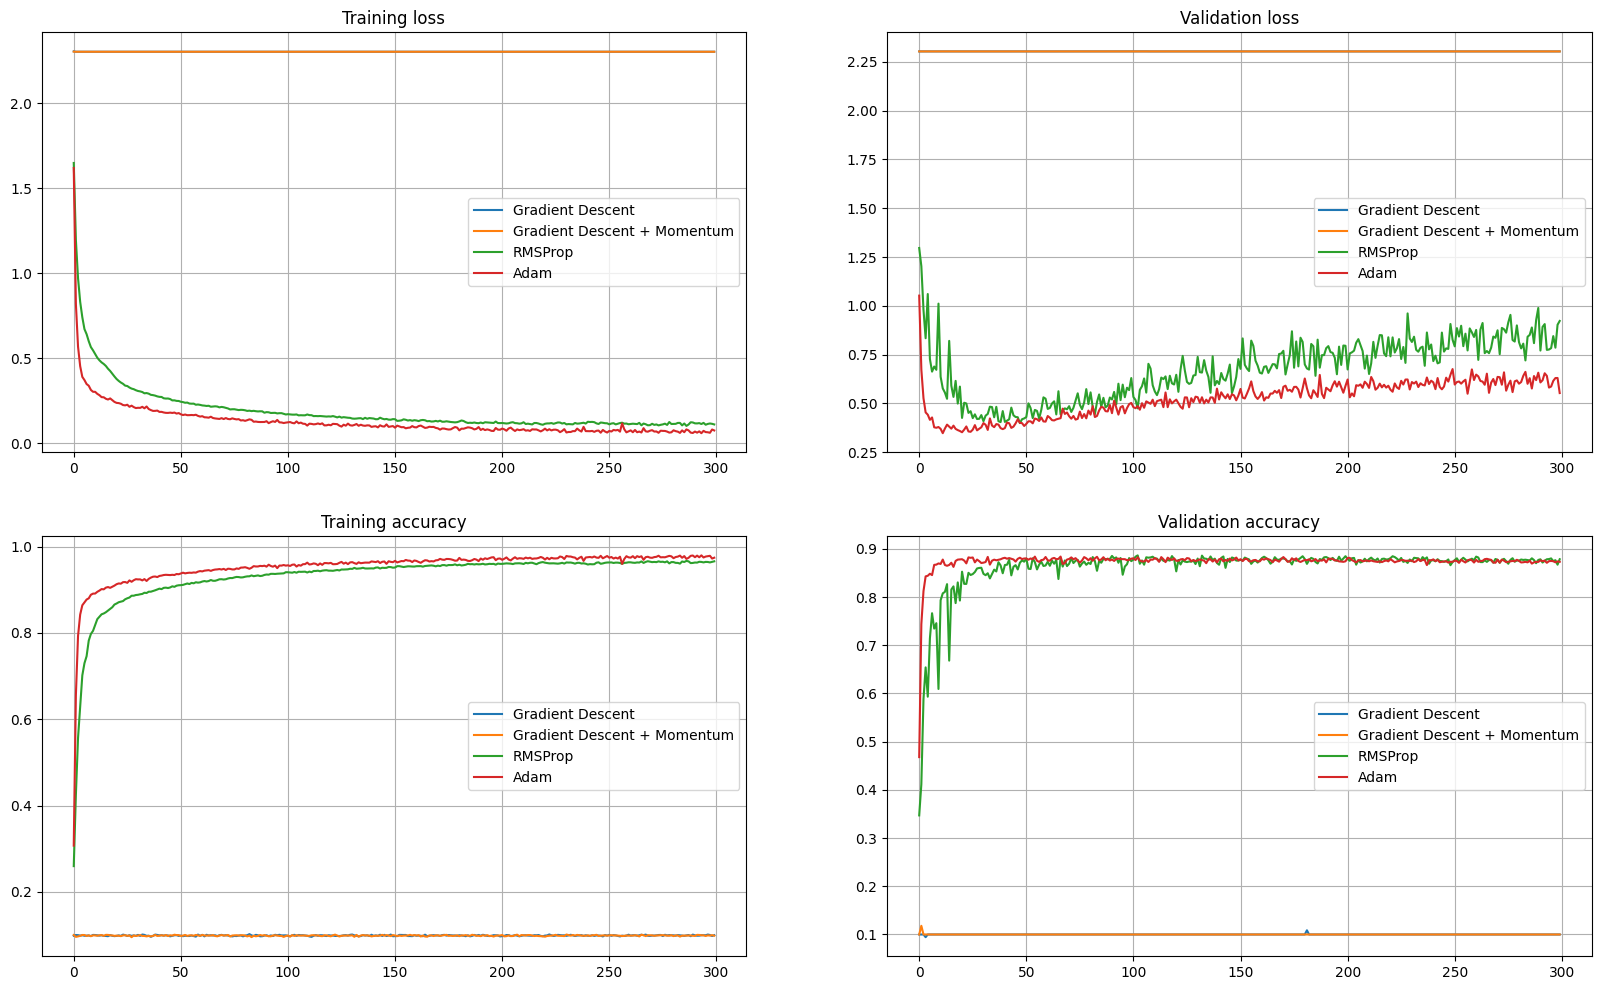

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(20, 12))

def single_plot(ax, data, title):
    for optimizer_name, values in data.items():
        ax.plot(values, label=f'{optimizer_name}')
    ax.set_title(title)
    ax.legend()
    ax.grid()

single_plot(ax[0, 0], train_losses, 'Training loss')
single_plot(ax[0, 1], val_losses, 'Validation loss')
single_plot(ax[1, 0], train_acc, 'Training accuracy')
single_plot(ax[1, 1], val_acc, 'Validation accuracy')

plt.show()